## Single Value decomposition and a change of coordinate system

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

First generate data points using three different Gauss-distributions with different standard deviations

In [3]:
N = 10000
t = np.random.normal(loc=0.0, scale=0.25, size=N)
s = np.random.normal(loc=0.0, scale=5.0, size=N)
r = np.random.normal(loc=0.0, scale=2.0, size=N)

The data is generated by adding the data points $r, s, t$ as a linear combination with the three vectors 
$$p_i = t_i \cdot \begin{pmatrix}1\\ 1\\ 1\end{pmatrix}+ s_i\cdot \begin{pmatrix}-2\\ 1\\ 1\end{pmatrix}+ r_i \cdot \begin{pmatrix}0\\ 1\\ -1\end{pmatrix},~~~ \forall i \in N$$
The three arrays $X, Y, Z$ of length $N$ contain the coordinates of every point. The Matrix $P \in \mathbb{R}^{3\times N}$ is a list of all coordinates combined.

In [4]:
X = [x-2*y for x,y in zip(t, s)]
Y = [x+y+z for x,y,z in zip(t, s, r)]
Z = [x+y-z for x,y,z in zip(t, s, r)]
P = np.matrix([[x,z,y] for x,y,z in zip(X,Y,Z)])

Using a *singular value decomposition* the rotation Matix can be found for the transformation:
$$X = U\Sigma W^T, ~~~ U,W~ \text{ orthogonal}$$
$$ U^TX = \Sigma W^T$$
The Matrix $U \in \mathbb{R}^{3\times 3}$ is an orthogonal matrix, *i.e.* $UU^T=U^TU=I$. The Matrix $\Sigma \in \mathbb{R}^{3\times N}$ is zero everywhere except for its diagonal, where the singular values $\sigma_1, \sigma_2, \sigma_3$ are in sorted order.
The rotation matrix $U$ will rotate the coordinate system, so that the largest variance is along the $x$-axis, the second largest along the $y$-axis and the smallest along the $z$-axis.

In [6]:
[u,s,w] = np.linalg.svd(P.T)
newData = u.T*P.T

Tendencies that were difficult to spot before are now more evident in the rotated coordinate system.

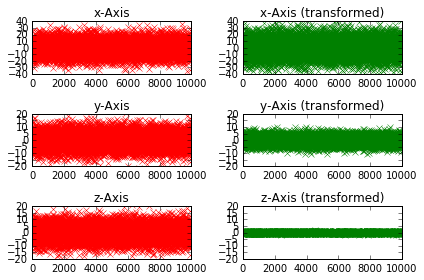

In [10]:
Xnew = newData.A[0]
Ynew = newData.A[1]
Znew = newData.A[2]

plt.figure(1)
plt.subplot(321)
plt.title('x-Axis')
plt.plot(X, 'rx')
plt.ylim([-40, 40])

plt.subplot(322)
plt.title('x-Axis (transformed)')
plt.plot(Xnew,'gx')
plt.ylim([-40, 40])

plt.subplot(323)
plt.title('y-Axis')
plt.plot(Y, 'rx')
plt.ylim([-20, 20])

plt.subplot(324)
plt.title('y-Axis (transformed)')
plt.plot(Ynew,'gx')
plt.ylim([-20, 20])

plt.subplot(325)
plt.title('z-Axis')
plt.plot(Z, 'rx')
plt.ylim([-20, 20])

plt.subplot(326)
plt.title('z-Axis (transformed)')
plt.plot(Znew,'gx')
plt.ylim([-20, 20])

plt.tight_layout()
plt.show()


The rotation is visible in this depiction of the datapoints.

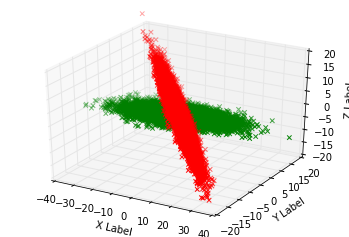

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r', marker='x')
ax.scatter(Xnew, Ynew, Znew, c='g', marker='x')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([-40, 40])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])
plt.show()


## Effect of singular value decomposition on a coordinate transformation from cartesian to spherical system
<img src="Spherical.png" height="210" width="210"/>
The rotation of the coordinate system has affects a coordinate transformation from cartesian to spherical.
$$
\begin{array}[rclr]
rr &=& \sqrt{x^2+y^2+z^2}& r \geq 0\\
\theta &=& \arctan\left( \frac{y}{x}\right) & \theta \in [-\pi, \pi] \\
\varphi &=& \arccos\left(\frac{z}{\sqrt{x^2+y^2+z^2}}\right)& \varphi \in [0, \pi] \\
\end{array}
$$

In [15]:
def Cart2Sphere(X,Y,Z):
    R     = [math.sqrt(x**2+y**2+z**2) for x,y,z in zip(X,Y,Z)]
    Theta = [math.atan(y/x) for x,y in zip(X,Y)]
    Phi   = [math.acos(z/math.sqrt(x**2+y**2+z**2)) for x,y,z in zip(X,Y,Z)]
    return R, Phi, Theta

* The radius $r$ is invariant to the singular value decomposition and the resulting rotation of the cartesian coordinate system, since the radius is the length of the vector or the Euclidian norm of the distance between the data point and the origin. \n
* The angle $\theta$ is closely related to the $x$-axis. It is measured as the angle between the $x$-axis and the projection of the data point onto the $xy$-plane. \n If therefore the axes are rotated, such that the larges data variance is along the $x$-axis, the angle $\theta$ will shift.\n
* The angle $\varphi$ is closely related to the $z$-axis. It is measured as the angle between the $z$-axis and the data point. Since the smalles variance in rotated onto the $z$-axis, the angle $\varphi$ is most likely to shrink closer towards zero. 

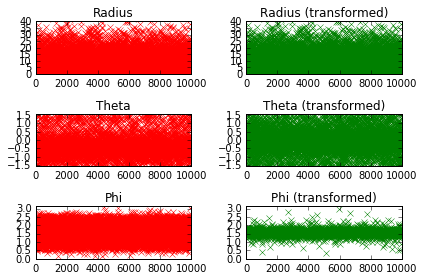

In [16]:
[R, Phi, Theta] = Cart2Sphere(X,Y,Z)
[Rnew, Phinew, Thetanew] = Cart2Sphere(Xnew,Ynew,Znew)


plt.figure(1)
plt.subplot(321)
plt.title('Radius')
plt.plot(R, 'rx')
plt.ylim([0, 40])

plt.subplot(322)
plt.title('Radius (transformed)')
plt.plot(Rnew,'gx')
plt.ylim([0, 40])

plt.subplot(323)
plt.title('Theta')
plt.plot(Theta, 'rx')
plt.ylim([-math.pi/2, math.pi/2])

plt.subplot(324)
plt.title('Theta (transformed)')
plt.plot(Thetanew,'gx')
plt.ylim([-math.pi/2, math.pi/2])

plt.subplot(325)
plt.title('Phi')
plt.plot(Phi, 'rx')
plt.ylim([0, math.pi])

plt.subplot(326)
plt.title('Phi (transformed)')
plt.plot(Phinew,'gx')
plt.ylim([0, math.pi])

plt.tight_layout()
plt.show()